/var/folders/74/9yc0dt9d53z15d2qpmgpxv4h0000gn/T/ipykernel_17877/2543850006.py:59: RuntimeWarning: invalid value encountered in log10
  sci_plot = ax[plot_idx].imshow(np.log10(PSF_retrieved), cmap='viridis', origin='lower')


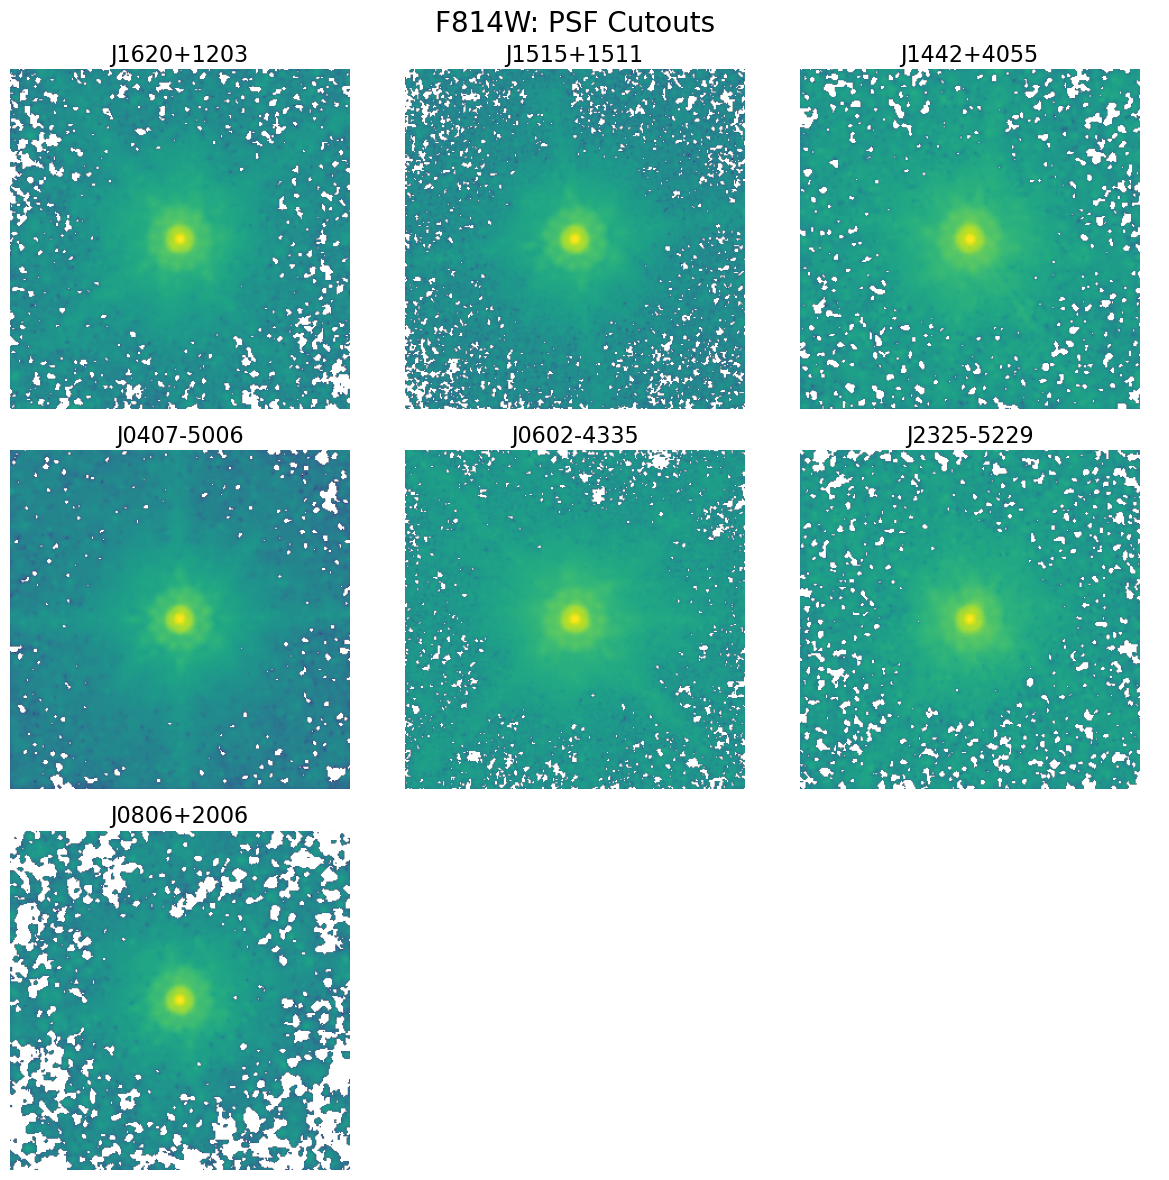

In [ ]:
# plot the individual PSF's in a filter

import os
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.visualization import ImageNormalize, LogStretch
from astropy import units as u  
import matplotlib.colors as colors

# quasar dictionary with filters
F814W = {
    'J1620+1203': ['F814W'],
    'J1515+1511': ['F814W'],
    'J1442+4055': ['F814W'],
    'J0407-5006': ['F814W'],
    'J0602-4335': ['F814W'],
    'J2325-5229': ['F814W'],
    'J0806+2006': ['F814W'],
}

F475X = {
    'J1620+1203': ['F475X'],
    'J1515+1511': ['F475X'],
    'J1442+4055': ['F475X'],
    'J0407-5006': ['F475X'],
    'J0602-4335': ['F475X'],
    'J2325-5229': ['F475X'],
    'J0806+2006': ['F475X'],
}

F160W = {
    'J1620+1203': ['F160W'],
    'J1515+1511': ['F160W'],
    'J1442+4055': ['F160W'],
    'J0407-5006': ['F160W'],
    'J0602-4335': ['F160W'],
    'J2325-5229': ['F160W'],
    'J0806+2006': ['F160W'],
}

filt = F814W

ncols = 3
num_quasars = sum(len(bands) for bands in filt.values()) 
nrows = (num_quasars + ncols - 1) // ncols 

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,12))
ax = ax.flatten()  

plot_idx = 0  

for quasar_name, bands in filt.items():
    for band in bands:

        PSF_retrieved = fits.open(f'../../cutout_data/{quasar_name}/{band}/outputs/full_PSF.fits')[0].data

        # plot the PSF image
        sci_plot = ax[plot_idx].imshow(np.log10(PSF_retrieved), cmap='viridis', origin='lower')
        ax[plot_idx].set_title(f'{quasar_name}', fontsize = 16)

        ax[plot_idx].axis('off')  # turn off axis
        plot_idx += 1  

# hide any unused subplots
for j in range(plot_idx, nrows * ncols):
    ax[j].axis('off')

if filt == F814W:
    title = 'F814W'
elif filt == F475X:
    title = 'F475X'
else:
    title = 'F160W'

fig.suptitle(f'{title}: PSF Cutouts', fontsize = 20)
plt.tight_layout()
plt.show()
